In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import os

In [3]:
all_communities = pd.DataFrame(columns=['text','label'])
for community_name in ['joy','bowel_diseases']:
    community_content = pd.read_csv('data_lemma/%s_lemma.csv' % (community_name), sep ='\t', encoding='utf-32')
    community_talks = pd.DataFrame(community_content.apply(
        lambda x: ' '.join(community_content.loc[x.name,['title']+list(map(str, range(1,25)))].dropna()), axis=1),
             columns=['text'])
    community_talks['label'] = community_name
    all_communities = pd.concat([all_communities,community_talks])
all_communities

,text,label
0,כאב נירופטי מ מקור לא ידע לפני שנה צינור ברזל ...,joy
1,כ ביים ב כול ה גוף היה חבר הוא סבל מ מחלה אוטו...,joy
2,"שמיעה מוזיקה הפחית כ ה אב אחרי ניתוח , הרבה פח...",joy
3,"כ ה אב ב ה ישיבה מ אזור פה ה טבעת שלום , לפני ...",joy
4,כאב תופת ב ה שן לסת חניכיים ו עוד מ מקור לא יד...,joy
...,...,...
2439,קורונה ו מחלה מעי דלקתי מה צריך ידע ? עודכן ל ...,bowel_diseases
2440,קרוהן חלה קרוהן ו רצה ידע האם יש סכנה ל שילוב ...,bowel_diseases
2441,תחליף ל ה קורטיפואם היה הוא חלה ב פרוקטיטיס עם...,bowel_diseases
2442,"ביולוגי שלום , בן עם קוליטיס ו AS טופל סימפון ...",bowel_diseases


In [5]:
all_communities = pd.DataFrame(columns=['text','label'])
com_list = ['joy','bowel_diseases','joints','psoriasis','sclerosis']
for i in range(len(com_list)):
    community_content = pd.read_csv('data_lemma/%s_lemma.csv' % (com_list[i]), sep ='\t', encoding='utf-32')
    community_talks = pd.DataFrame(community_content.apply(
        lambda x: ' '.join(community_content.loc[x.name,['title']+list(map(str, range(1,25)))].dropna()), axis=1),
             columns=['text'])
    community_talks['label'] = i
    all_communities = pd.concat([all_communities,community_talks])
all_communities

,text,label
0,כאב נירופטי מ מקור לא ידע לפני שנה צינור ברזל ...,0
1,כ ביים ב כול ה גוף היה חבר הוא סבל מ מחלה אוטו...,0
2,"שמיעה מוזיקה הפחית כ ה אב אחרי ניתוח , הרבה פח...",0
3,"כ ה אב ב ה ישיבה מ אזור פה ה טבעת שלום , לפני ...",0
4,כאב תופת ב ה שן לסת חניכיים ו עוד מ מקור לא יד...,0
...,...,...
1881,עדכון מפתיע לגבי ה טיפול ב חולי טרשת נפוץ לאור...,4
1882,חוסר ריכוז שלום הוא בת חולה טרשת נפוץ מ שלושה ...,4
1883,שאלה על טקפידרה התחיל לפני שבוע טיפול ב ה טקפי...,4
1884,ריפא את היא שלום איך הוא עבר מרפאה מ איפה ש הו...,4


In [6]:
train_df, test_df = model_selection.train_test_split(all_communities)
test_df

,text,label
554,פעילות גופני עם טרשת נפוץ חלק מ ה טיפול ב טרשת...,4
1303,"עישון קנאביס הי , מחר קיבל רישיון ו סיגריה ב ה...",4
1000,זכות ב זמן הליך אבחון נמצא מאפריל ב אבחון אבחו...,4
464,"Trigeminal Neuraglgia ערב טוב ל ה כולם , אמי א...",0
1980,"רמיקייד כבר לא השפיע ... הי , הוא חלה קרהון כב...",1
...,...,...
117,מגרד בתוך ה אוזן הי כולם !!! יש ל אני פסורי . ...,3
1812,תחושה חולי אחרי קעקוע ? אתמול עדיתי קעקוע חדש ...,4
1168,טיפול ב טרשת נפוץ ב מינון גבוה של ויטמין D שלו...,4
1199,עמד לפני ניתוח אצל ד ר חננאל בבלינסון מישהו הכ...,1


1    1863
4    1400
0    1013
2     580
3     339
Name: label, dtype: int64
1    0.358614
4    0.269490
0    0.194995
2    0.111646
3    0.065255
Name: label, dtype: float64


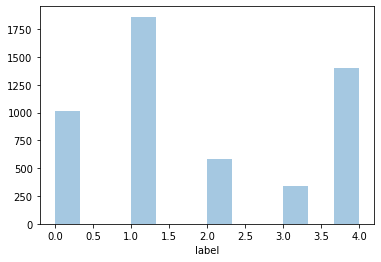

In [7]:
tot=len(train_df)
print(train_df.label.value_counts())
print(train_df.label.value_counts()/tot)
sns.distplot(train_df.label, kde=False)

In [8]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_df.text)
X_train_counts.shape

(5195, 32218)

In [9]:
X_test_counts = count_vect.transform(test_df.text)
X_test_counts.shape

(1732, 32218)

In [10]:
count_vect.vocabulary_.get('כאב')

15933

In [11]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(5195, 32218)

In [12]:
X_test_tf = tf_transformer.transform(X_test_counts)

In [33]:
clf=LogisticRegression(max_iter=200).fit(X_train_tf, train_df.label.astype(str))

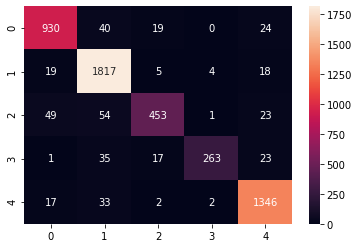

In [39]:
train_predicted=clf.predict(X_train_tf)
cm = confusion_matrix(train_df.label.astype(str), train_predicted)
sns.heatmap(cm, annot=True, fmt="d")

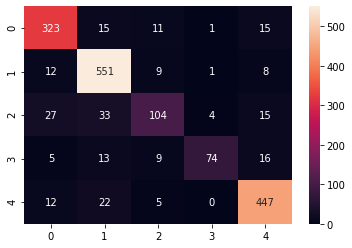

In [36]:
test_predicted=clf.predict(X_test_tf)
cm = confusion_matrix(test_df.label.astype(str), test_predicted)
sns.heatmap(cm, annot=True, fmt="d")

In [21]:
print(clf.coef_)

[[ 2.19152500e-02  2.73903690e-03  4.58072852e-03 ... -1.17965061e-02
  -8.32439196e-03 -1.63538258e-02]
 [-9.51893955e-04 -7.90419049e-04 -7.81948823e-04 ... -1.34428229e-02
  -1.23511781e-02 -1.69082228e-03]
 [-2.04940087e-02 -1.68359177e-03 -2.03727420e-03 ... -4.23801412e-03
   3.23249474e-02  1.90794168e-02]
 [-3.46148152e-04 -7.16669806e-05 -3.45209325e-04 ...  4.58981587e-02
  -4.82920146e-03 -3.84067526e-04]
 [-1.23199263e-04 -1.93359100e-04 -1.41629618e-03 ... -1.64208155e-02
  -6.82017579e-03 -6.50701180e-04]]


In [22]:
inverse_dict={count_vect.vocabulary_[w]:w for w in count_vect.vocabulary_.keys()}
print(inverse_dict[0])
print(inverse_dict[7111])

aa
בתרשת


In [23]:
def get_strongest_words(label):
    cur_coef=clf.coef_[label]
    word_df=pd.DataFrame({"val":cur_coef}).reset_index().sort_values(["val"],ascending=[False])
    word_df.loc[:, "word"]=word_df["index"].apply(lambda v:inverse_dict[v])
    print(word_df.head(10))

In [30]:
for i,community in enumerate(com_list):
    print('\n',community)
    get_strongest_words(i)


 joy
       index       val   word
7727    7727  7.553842     גר
15933  15933  6.474273    כאב
7325    7325  3.925909    גור
8524    8524  3.514056     דר
20794  20794  2.384859  מרפאה
6655    6655  1.945949   בעיה
22867  22867  1.930378    סבל
24776  24776  1.798901    עצב
2703    2703  1.761084     אב
8233    8233  1.678912   דיסק

 bowel_diseases
       index       val     word
28238  28238  7.989725    קרוהן
27422  27422  5.634525  קוליטיס
20269  20269  5.310112      מעי
8414    8414  2.981295       דן
14975  14975  2.874400   יומירה
14694  14694  2.774057     טרנר
6048    6048  2.544892      בטן
10549  10549  2.422178    הצלחה
7650    7650  2.293419    גסטרו
4283    4283  2.253117      אכל

 joints
       index       val       word
20429  20429  6.190421       מפרק
8343    8343  3.370659       דלקת
28436  28436  2.891585  ראומטולוג
26654  26654  2.697240        פרק
15933  15933  2.366457        כאב
6966    6966  2.295320        ברך
170      170  2.133471         as
6125    6125  

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train_tf, train_df.label.astype(str))

In [ ]:
rf_prediction=clf.predict(X_test_tfidf)
evaluator.evaluate(rf_prediction)